In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
#import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [41]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [42]:
data.shape

(397, 6)

In [43]:
data.columns = data.columns.str.replace('.', '_')

In [45]:
data.isnull().sum()

rank             0
discipline       0
yrs_since_phd    0
yrs_service      0
sex              0
salary           0
dtype: int64

In [46]:
data.dtypes

rank             object
discipline       object
yrs_since_phd     int64
yrs_service       int64
sex              object
salary            int64
dtype: object

In [48]:
from sklearn.preprocessing import OrdinalEncoder

In [49]:
rank_d={'AsstProf':1, 'AssocProf':2,'Prof':3}
data['rank']=data['rank'].map(rank_d)

In [50]:
data= pd.get_dummies(data,drop_first=True)

In [51]:
df=data.copy()

In [52]:
df.head()

,rank,yrs_since_phd,yrs_service,salary,discipline_B,sex_Male
0,3,19,18,139750,1,1
1,3,20,16,173200,1,1
2,1,4,3,79750,1,1
3,3,45,39,115000,1,1
4,3,40,41,141500,1,1


In [56]:
df.nunique()

rank               3
yrs_since_phd     53
yrs_service       52
salary           371
discipline_B       2
sex_Male           2
dtype: int64

In [57]:
df['rank'].nunique()

3

In [75]:
df.describe()

,rank,yrs_since_phd,yrs_service,salary,discipline_B,sex_Male
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,2.501259,22.314861,17.614610,113706.458438,0.544081,0.901763
std,0.767472,12.887003,13.006024,30289.038695,0.498682,0.298010
min,1.000000,1.000000,0.000000,57800.000000,0.000000,0.000000
25%,2.000000,12.000000,7.000000,91000.000000,0.000000,1.000000
50%,3.000000,21.000000,16.000000,107300.000000,1.000000,1.000000
75%,3.000000,32.000000,27.000000,134185.000000,1.000000,1.000000
max,3.000000,56.000000,60.000000,231545.000000,1.000000,1.000000


In [59]:
import seaborn as sns

In [60]:
corelation= df.corr()

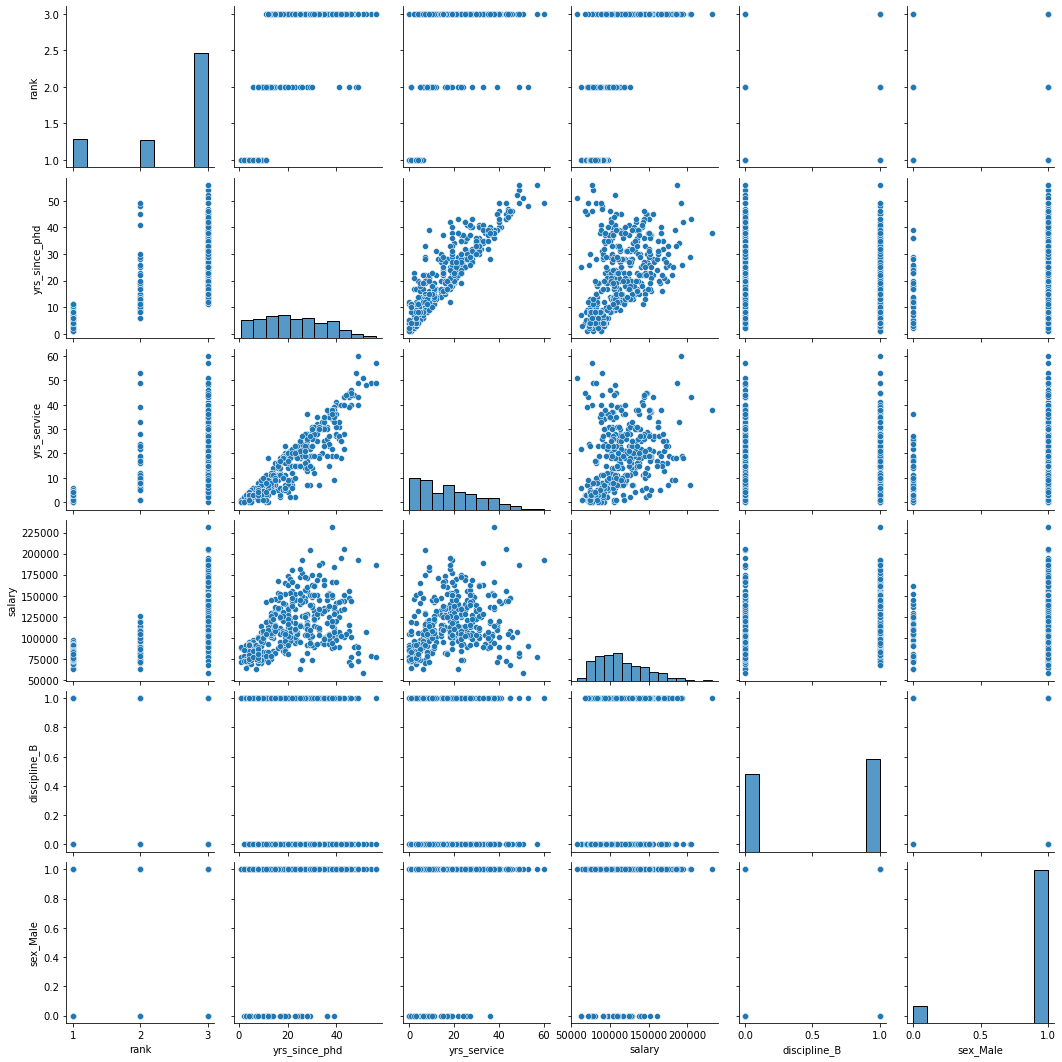

In [61]:
sns.pairplot(df)

<AxesSubplot:>

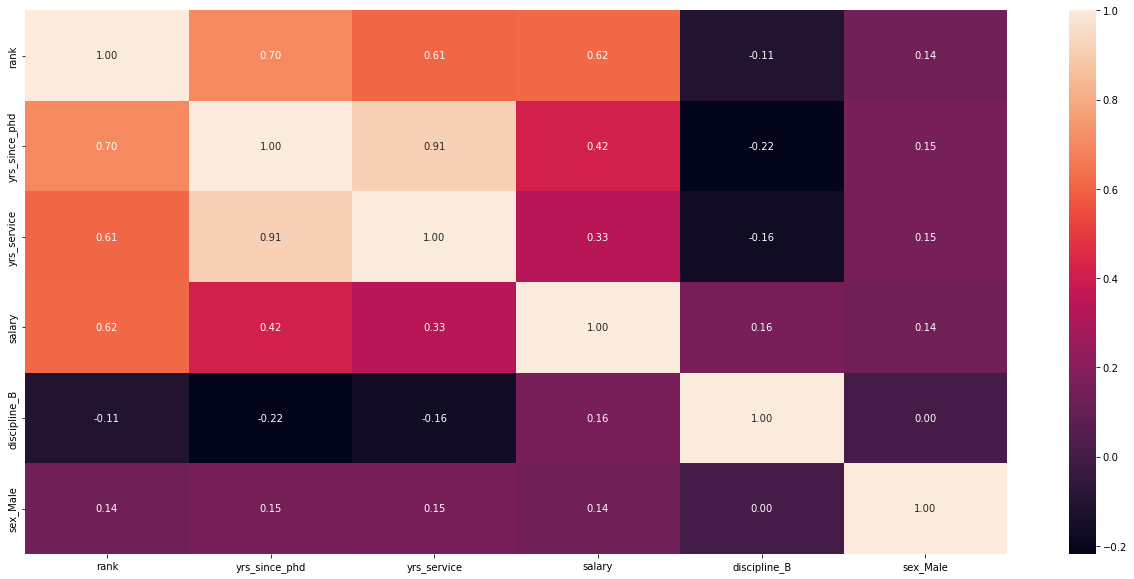

In [62]:
plt.figure(figsize=(22,10))
sns.heatmap(corelation,annot=True, linecolor="black", fmt="0.2f")

In [63]:
x=df.drop(columns=['salary'],axis=1)
y=df['salary']

In [64]:
x

,rank,yrs_since_phd,yrs_service,discipline_B,sex_Male
0,3,19,18,1,1
1,3,20,16,1,1
2,1,4,3,1,1
3,3,45,39,1,1
4,3,40,41,1,1
...,...,...,...,...,...
392,3,33,30,0,1
393,3,31,19,0,1
394,3,42,25,0,1
395,3,25,15,0,1


In [65]:
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

In [125]:
x_train,x_test,y_train,y_test = train_test_split(x, y , test_size=0.2, random_state=210)

In [126]:
from sklearn.linear_model import LinearRegression

In [135]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [127]:
l_r=LinearRegression()

In [128]:
l_r.fit(x_train,y_train)

LinearRegression()

In [129]:
y_pred = l_r.predict(x_test)

In [130]:
y_pred

array([122375.08962362,  85038.96811467, 118366.72861558, 131406.29027666,
        92845.23736531, 107924.74131686, 131021.02703373, 122332.98712068,
        70814.19565486, 137917.72110747, 138633.4636574 ,  69026.86838201,
        82102.19182954, 112122.38003975, 130159.9548255 , 117259.38210622,
        95788.35436694, 115074.05040822, 116669.9470651 , 131351.50634073,
       117337.2463956 , 116025.72808806, 138218.77934453, 131105.2320396 ,
       137020.88711281, 132471.53428307, 130719.96879668, 131351.50634073,
        91828.43657833,  67666.90685504, 131778.8720866 , 116747.81135448,
       130467.35377905,  88487.31515154,  81975.88432073, 118072.01109502,
       129349.64798674, 118625.68434969, 116097.25166095, 115051.02980401,
       130461.01306256, 138772.4525992 , 134300.96405885, 134721.98908822,
        69454.23412788, 138934.52189446, 130930.48131136, 108366.57430009,
       130978.92453079, 106901.59981338, 131785.21280309, 117259.38210622,
       119551.93941431, 1

without standarisation

In [137]:
print('r2_score :',r2_score(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('RMSE :',np.sqrt(mean_absolute_error(y_test,y_pred)))

print('/n', '-' *50)

print('Training score :', l_r.score(x_train,y_train))
print('testing score:', l_r.score(x_test,y_test))

r2_score : 0.495074824856381
MAE : 15387.415112684695
MSE : 412284269.0287038
RMSE : 124.04602014044907
/n --------------------------------------------------
Training score : 0.4300772517817213
testing score: 0.495074824856381


In [138]:
from sklearn.linear_model import Ridge

In [139]:
x=df.drop(columns=['salary'],axis=1)
y=df['salary']


x_train,x_test,y_train,y_test = train_test_split(x, y , test_size=0.2, random_state=210)
l_r=Ridge()


l_r.fit(x_train,y_train)

y_pred = l_r.predict(x_test)

print('r2_score :',r2_score(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('RMSE :',np.sqrt(mean_absolute_error(y_test,y_pred)))

print('/n', '-' *50)

print('Training score :', l_r.score(x_train,y_train))
print('testing score:', l_r.score(x_test,y_test))

r2_score : 0.4959875892408091
MAE : 15366.758140932496
MSE : 411538973.65514207
RMSE : 123.96272883787488
/n --------------------------------------------------
Training score : 0.4300455976977088
testing score: 0.4959875892408091


In [141]:
from sklearn.linear_model import BayesianRidge

In [142]:
x=df.drop(columns=['salary'],axis=1)
y=df['salary']


x_train,x_test,y_train,y_test = train_test_split(x, y , test_size=0.2, random_state=210)
l_r=BayesianRidge()


l_r.fit(x_train,y_train)

y_pred = l_r.predict(x_test)

print('r2_score :',r2_score(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('RMSE :',np.sqrt(mean_absolute_error(y_test,y_pred)))

print('/n', '-' *50)

print('Training score :', l_r.score(x_train,y_train))
print('testing score:', l_r.score(x_test,y_test))

r2_score : 0.4977494866559643
MAE : 15326.801756686353
MSE : 410100339.52939427
RMSE : 123.80146104423143
/n --------------------------------------------------
Training score : 0.4297394734328829
testing score: 0.4977494866559643


In [143]:
x

,rank,yrs_since_phd,yrs_service,discipline_B,sex_Male
0,3,19,18,1,1
1,3,20,16,1,1
2,1,4,3,1,1
3,3,45,39,1,1
4,3,40,41,1,1
...,...,...,...,...,...
392,3,33,30,0,1
393,3,31,19,0,1
394,3,42,25,0,1
395,3,25,15,0,1


In [144]:
scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

In [145]:
x_scaled

array([[ 0.65066837, -0.25754973,  0.02966908,  0.91540317,  0.3300584 ],
       [ 0.65066837, -0.17985426, -0.12429986,  0.91540317,  0.3300584 ],
       [-1.95857752, -1.42298184, -1.12509795,  0.91540317,  0.3300584 ],
       ...,
       [ 0.65066837,  1.52944617,  0.56856036, -1.09241483,  0.3300584 ],
       [ 0.65066837,  0.20862311, -0.20128433, -1.09241483,  0.3300584 ],
       [-1.95857752, -1.11219995, -1.04811348, -1.09241483,  0.3300584 ]])

In [146]:
x=df.drop(columns=['salary'],axis=1)
y=df['salary']


x_train,x_test,y_train,y_test = train_test_split(x_scaled, y , test_size=0.2, random_state=210)
l_r=LinearRegression()


l_r.fit(x_train,y_train)

y_pred = l_r.predict(x_test)

print('r2_score :',r2_score(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('RMSE :',np.sqrt(mean_absolute_error(y_test,y_pred)))

print('/n', '-' *50)

print('Training score :', l_r.score(x_train,y_train))
print('testing score:', l_r.score(x_test,y_test))

r2_score : 0.4950748248563811
MAE : 15387.415112684694
MSE : 412284269.0287037
RMSE : 124.04602014044906
/n --------------------------------------------------
Training score : 0.4300772517817212
testing score: 0.4950748248563811


In [147]:
x=df.drop(columns=['salary'],axis=1)
y=df['salary']


x_train,x_test,y_train,y_test = train_test_split(x_scaled, y , test_size=0.2, random_state=100)
l_r=Ridge()


l_r.fit(x_train,y_train)

y_pred = l_r.predict(x_test)

print('r2_score :',r2_score(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('RMSE :',np.sqrt(mean_absolute_error(y_test,y_pred)))

print('/n', '-' *50)

print('Training score :', l_r.score(x_train,y_train))
print('testing score:', l_r.score(x_test,y_test))

r2_score : 0.365071524483328
MAE : 19298.336918566107
MSE : 654756198.4280795
RMSE : 138.91845420449403
/n --------------------------------------------------
Training score : 0.4630127075586993
testing score: 0.365071524483328
